# Estudo de Caso - iFOOD

## Objetivo: Ajudar o time de Marketing a ter um resultado maior nas próximas campanhas.

In [82]:
import pandas as pd

# Lê o arquivo CSV e atribui à variável df
df = pd.read_csv('ifood2_df.csv')

In [9]:
df.head(2)

,Renda,Criança em casa,Jovens em casa,Comportmento do Consumidor,Prod_Vinho,Prod_Fruta,Prod_Carne,Prod_Peixe,Prod_Doce,Prod_Ouro,...,Juntos,Viúvos,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Gasto_Total,Gasto_RegularProd,Campanhas Aceitas
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0


In [35]:
df.loc[:,'Age']

0     50
1     50
2     35
3     30
4     66
      ..
95    31
96    38
97    59
98    40
99    44
Name: Age, Length: 100, dtype: int32

### Análise Demográfica: Idade, Estado civil e Nível de Escolaridade para segmentar os clientes em grupos:

C:\Users\thays\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


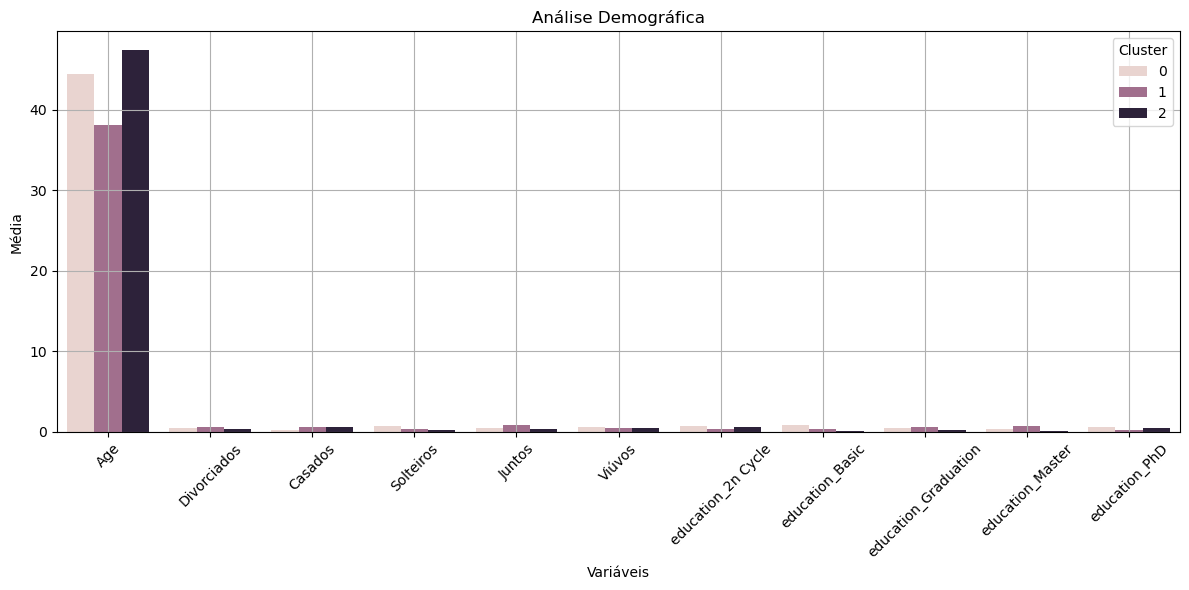

In [43]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Exemplo de DataFrame 
data = {
    'Age': np.random.randint(18, 70, size=100),
    'Divorciados': np.random.randint(0, 2, size=100),
    'Casados': np.random.randint(0, 2, size=100),
    'Solteiros': np.random.randint(0, 2, size=100),
    'Juntos': np.random.randint(0, 2, size=100),
    'Viúvos': np.random.randint(0, 2, size=100),
    'education_2n Cycle': np.random.randint(0, 2, size=100),
    'education_Basic': np.random.randint(0, 2, size=100),
    'education_Graduation': np.random.randint(0, 2, size=100),
    'education_Master': np.random.randint(0, 2, size=100),
    'education_PhD': np.random.randint(0, 2, size=100)
}
df = pd.DataFrame(data)

# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Altere n_clusters conforme necessário
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Calcular a média de cada variável para cada cluster
cluster_means = df.groupby('Cluster').mean().reset_index()

# Criar um gráfico de barras das médias
cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Variável', value_name='Média')

plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_means_melted, x='Variável', y='Média', hue='Cluster')
plt.title('Análise Demográfica')
plt.xticks(rotation=45)
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()


### Análise de Frequência de Compras: 

Examinar as colunas NumDealsPurchases (número de compras realizadas com desconto), 

NumWebPurchases, NumCatalogPurchases (número de compras feitas usando catálogo), 

NumStorePurchases (número de compras feitas diretamente em lojas), para entender a frequência e preferência de canais de compra;

'\nEstatísticas descritivas:'

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,2.318367,4.100680,2.645351,5.823583
std,1.886107,2.737424,2.798647,3.241796
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000



Tabela de Frequência de Compras:
       Canal de Compra  Frequência
0    NumDealsPurchases        5112
1      NumWebPurchases        9042
2  NumCatalogPurchases        5833
3    NumStorePurchases       12841


C:\Users\thays\AppData\Local\Temp\ipykernel_13220\2124486785.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Canal de Compra', data=frequencia_compras, palette='viridis')


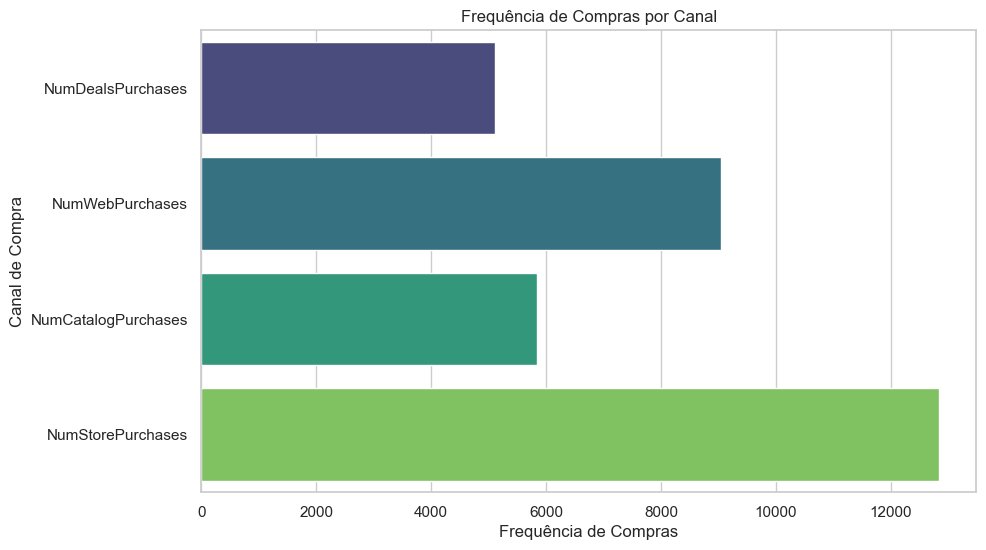

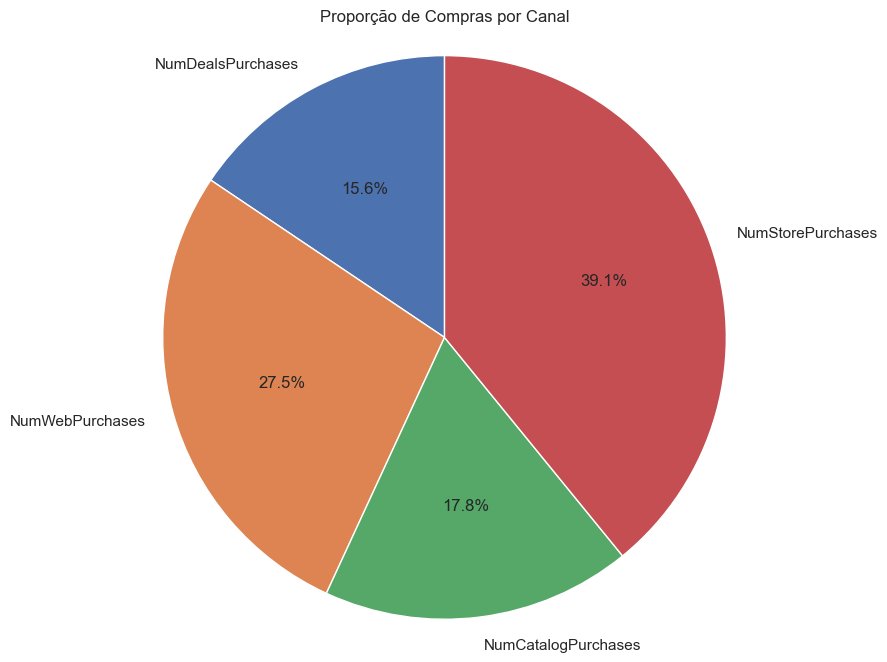

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização dos gráficos
sns.set(style="whitegrid")

df = pd.read_csv('ifood2_df.csv')

# Calcular estatísticas descritivas das colunas de interesse
estatisticas = df[colunas_interesse].describe()
display("\nEstatísticas descritivas:")
display(estatisticas)

# Criar um DataFrame para análise de frequência
frequencia_compras = df[colunas_interesse].sum().reset_index()
frequencia_compras.columns = ['Canal de Compra', 'Frequência']

# Exibir a tabela de frequência
print("\nTabela de Frequência de Compras:")
print(frequencia_compras)

# Criar um gráfico de barras para visualizar a frequência de compras
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequência', y='Canal de Compra', data=frequencia_compras, palette='viridis')
plt.title('Frequência de Compras por Canal')
plt.xlabel('Frequência de Compras')
plt.ylabel('Canal de Compra')
plt.show()

# Criar um gráfico de pizza para visualizar a proporção de cada canal de compra
plt.figure(figsize=(8, 8))
plt.pie(frequencia_compras['Frequência'], labels=frequencia_compras['Canal de Compra'], autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Compras por Canal')
print()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Análise de Produtos Populares: 


Análise descritiva:

        Prod_Vinho   Prod_Fruta   Prod_Carne   Prod_Peixe    Prod_Doce  \
count  2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    306.164626    26.403175   165.312018    37.756463    27.128345   
std     337.493839    39.784484   217.784507    54.824635    41.130468   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      24.000000     2.000000    16.000000     3.000000     1.000000   
50%     178.000000     8.000000    68.000000    12.000000     8.000000   
75%     507.000000    33.000000   232.000000    50.000000    34.000000   
max    1493.000000   199.000000  1725.000000   259.000000   262.000000   

         Prod_Ouro  
count  2205.000000  
mean     44.057143  
std      51.736211  
min       0.000000  
25%       9.000000  
50%      25.000000  
75%      56.000000  
max     321.000000  

Soma dos produtos vendidos:
Prod_Vinho    675093
Prod_Fruta     58219
Prod_Carne    364513
Prod_Peixe     83253
Prod_Doce

C:\Users\thays\AppData\Local\Temp\ipykernel_3344\2352720444.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soma_produtos.index, y=soma_produtos.values, palette='viridis')


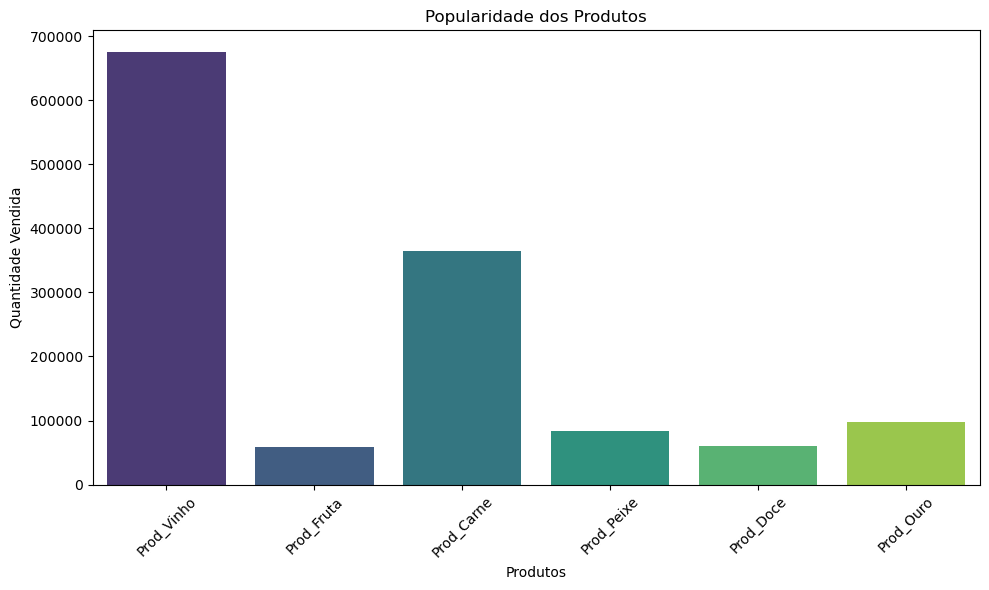

In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados do arquivo CSV
df = pd.read_csv('ifood2_df.csv')

# Selecionando apenas as colunas de interesse
colunas_interesse = ['Prod_Vinho', 'Prod_Fruta', 'Prod_Carne', 'Prod_Peixe', 'Prod_Doce', 'Prod_Ouro']
df_interesse = df[colunas_interesse]

# Análise descritiva
print("\nAnálise descritiva:")
print()
print(df_interesse.describe())

# Somando as quantidades de cada produto
soma_produtos = df_interesse.sum()

# Exibindo a soma dos produtos
print("\nSoma dos produtos vendidos:")
print(soma_produtos)

# Criando um gráfico de barras para visualizar a popularidade dos produtos
plt.figure(figsize=(10, 6))
sns.barplot(x=soma_produtos.index, y=soma_produtos.values, palette='viridis')
plt.title('Popularidade dos Produtos')
print()
plt.xlabel('Produtos')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Comportamento de Compra:

In [10]:
import pandas as pd

df = pd.read_csv('ifood2_df.csv')

compras = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

estatisticas = compras.describe()

display(estatisticas)




,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,2.318367,4.100680,2.645351,5.823583
std,1.886107,2.737424,2.798647,3.241796
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


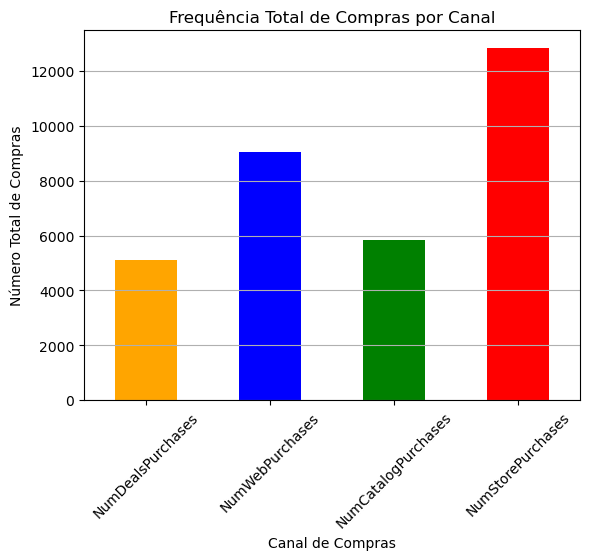

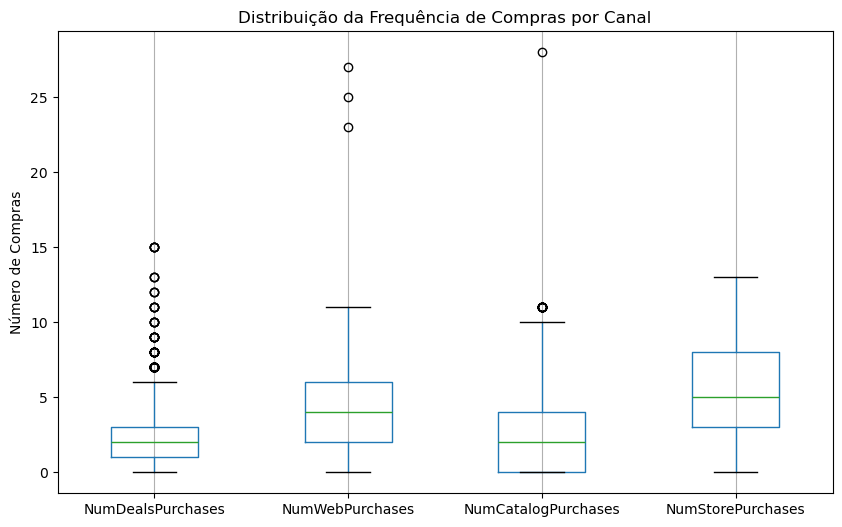

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
NumDealsPurchases,1.000000,0.252502,-0.058625,0.072710
NumWebPurchases,0.252502,1.000000,0.420890,0.512109
NumCatalogPurchases,-0.058625,0.420890,1.000000,0.561261
NumStorePurchases,0.072710,0.512109,0.561261,1.000000


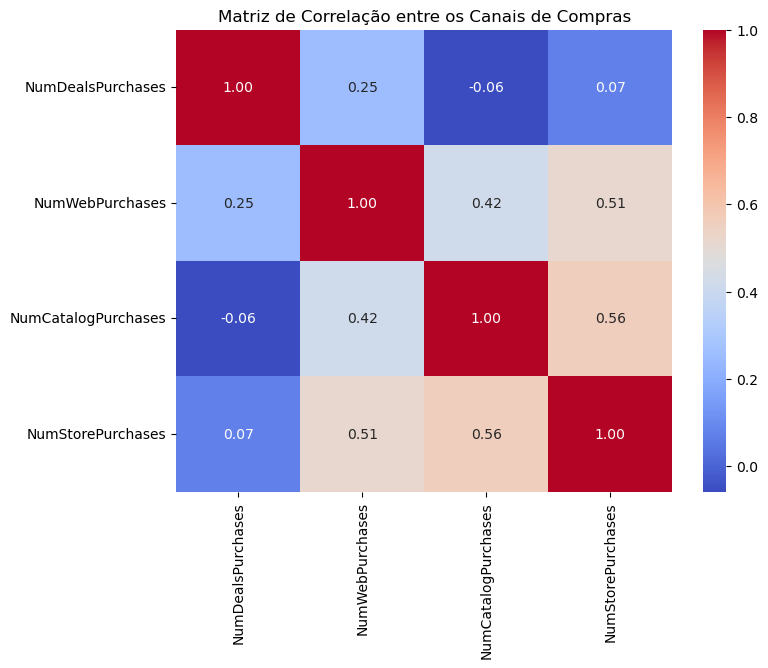

In [26]:
import matplotlib.pyplot as plt

# Calcular a soma total de compras por canal
soma_compras = compras.sum()

# Criar um gráfico de barras
soma_compras.plot(kind='bar', color=['orange', 'blue', 'green', 'red'])
plt.title('Frequência Total de Compras por Canal')
plt.xlabel('Canal de Compras')
plt.ylabel('Número Total de Compras')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print()
# Criar um gráfico de caixa para visualizar a distribuição
plt.figure(figsize=(10, 6))
compras.boxplot()
plt.title('Distribuição da Frequência de Compras por Canal')
plt.ylabel('Número de Compras')
plt.xticks([1, 2, 3, 4], ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])
plt.grid(axis='y')
plt.show()
print()

# Calcular a matriz de correlação
correlacao = compras.corr()
print()
# Exibir a matriz de correlação
display(correlacao)

# Criar um heatmap para visualizar a correlação
import seaborn as sns

print()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre os Canais de Compras')
plt.show()
